# Social Computing/Social Gaming - Summer 2020
# Exercise Sheet 1 - Introduction to Python
We will be using Python for all exercises. In this exercise you will create a basic Python program. 

## Task 1.1: Python Pyramid
**a)** Create a function which takes a number of levels (N) and prints a pyramid that looks like this for N = 4:

In [1]:
   # 
  ###
 #####
#######

**Hints:**
- Do not forget the spaces left and right of the pyramid, except on the ground floor. In the example above 3 spaces to the left and right at the peak.  
- In order to execute a code cell, press Shift + Enter.

In [2]:
def printPyramid(N):
    # TODO your code here
    for i in range(1,N+1):
        s = ""
        for j in range(1,N+1-i):
            s = s + " "
        for j in range(1,1+(i-1)*2+1):
            s = s + "#"
        print(s)
         
printPyramid(4)

   #
  ###
 #####
#######


**b)** Extend the program by implementing user input. The user is asked to enter a number for the levels of the pyramid. Afterwards the pyramid is printed.

In [3]:
# TODO
num_levels = 8
printPyramid(num_levels)

       #
      ###
     #####
    #######
   #########
  ###########
 #############
###############


## Task 1.2: The Simposons are introducing Social Computing
In social computing research, we need powerful tools to create, manipulate and display graphs. Luckily, there is a plethora of tools and libaries for that. 
NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

Especially for the second exercise sheet, we are going to use [**NetworkX**](https://networkx.github.io). It provides rich graph data structures and many out-of-the-box functions to process graphs and calculate different metrics. The tasks below should make you familiar with the library.<br>
Please consult the [reference](https://networkx.github.io/documentation/stable/reference/index.html) and the [tutorial](https://networkx.github.io/documentation/stable/tutorial.html).

To give you a short background on graph visualization, it is the research area in mathematics/computer science concerned with drawing graphs. It has applications in many fields, one of them is social computing. The quality of graph visualization is measured based on certain criteria, for example crossing minimization and bend minimization. There are many graph drawing algorithms that vary in their quality according to the graph's application and size. One technique is to draw graphs by using physical analogies.<br>
The basic idea of this technique is to associate edges between graph nodes with physical forces acting upon the nodes and computing an energy minimum. By setting off the dynamics that is induced by the forces, the graph will finally settle into a natural optimal display. A famous algorithm that implements this technique is the **Fruchtermann-Rheingold** algorithm. Its basic idea is to replace the graph edges with mechanical springs, and let the springs move the system to a minimal energy state.


Furthermore, you will be working with a large datasets, you need to save the variables in a suitable data format. In our case, the pandas library is a good choice. 
A pandas DataFrame is a 2D tabular structure, not unlike a SQL table.
Pandas DataFrame consists of rows, columns and data.
For more information on the library, see the [pandas manual](https://pandas.pydata.org/pandas-docs/version/0.19.2) and its [tutorial](https://pandas.pydata.org/pandas-docs/version/0.19.2/10min.html) to pandas dataframes.

In this exercise you will analyze a dataset about "The Simpsons".

First import the datasets consisting ``nodes.csv``, ``edges.csv`` and ``ep-char.csv``.

- **nodes.csv**: each vertex represents a character
- **edges.csv**: edges between the source character and target character. Represents an undirected graph showing the characters which appeared together in an episode
- **ep-char.csv**: shows which character has appeared in which episode


**Hints**: 
- For most TODOs it is sufficient to look at the pandas manual and use pandas library functions  
- You can get a better overview of the dataframe by printing it


Import the necessary libraries for this exercise.


In [4]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

Read the csv files into pandas dataframes.

In [5]:
# read the csv into pandas DataFrames
df_edges = pd.read_csv("edges.csv")
df_nodes = pd.read_csv("nodes.csv")
df_epchar = pd.read_csv("ep-char.csv")

# 203 is the number of the last episode in season 9.
HIGHEST_EPISODE = 203

**a)** Your first task is to drop unwanted rows in the episodes dataframe. We are only interested in Seasons 1-9. 
Unwanted rows are rows which have an ``episode_id`` higher than ``HIGHEST_EPISODE``. 

In [6]:
print(df_edges.head(), df_edges.shape)
print(df_nodes.head(), df_nodes.shape)
print(df_epchar.head(), df_epchar.shape)

   Source  Target        Type  Weight
0       2       1  Undirected     441
1       1       2  Undirected     441
2       3       1  Undirected     438
3       1       3  Undirected     438
4       3       2  Undirected     393 (13330, 4)
   Id          charname
0   1   'Homer Simpson'
1   2   'Marge Simpson'
2   3    'Bart Simpson'
3   4    'Lisa Simpson'
4   5  'Maggie Simpson' (651, 2)
   episode_id  character_id
0           1             1
1           1             2
2           1             3
3           1             4
4           1            32 (4903, 2)


In [7]:
# TODO: drop rows of the df_epchar DataFrame.
indexNames = df_epchar.index[df_epchar['episode_id'] >HIGHEST_EPISODE]

# Delete these row indices from the dataframe
df_epchar.drop(indexNames, inplace=True)
print(df_epchar.shape)

(1687, 2)


**b)** Now you can merge the DataFrames together to link the required information. This is not unlike the join operation in SQL.

Since we are only interested in characters from the first 9 seasons, create a DataFrame ``df_merged`` which only contains characters from the first 203 episodes.

In [8]:
# TODO:
df_merged = df_epchar.merge(df_nodes, left_on='character_id', right_on='Id')
#df_merged = pd.merge(df_epchar, df_nodes_new, on='character_id')
print(df_merged.shape)
print(df_merged.head())

# df_merged now consists of the characters which appear only in the first 9 seasons
df_merged.drop(['episode_id', 'character_id'], axis=1, inplace=True)

# TODO: now we have unnecessary information, drop the duplicates
df_merged = df_merged.drop_duplicates()
print(df_merged.shape, df_merged.head())

(1687, 4)
   episode_id  character_id  Id         charname
0           1             1   1  'Homer Simpson'
1           2             1   1  'Homer Simpson'
2           3             1   1  'Homer Simpson'
3           4             1   1  'Homer Simpson'
4           5             1   1  'Homer Simpson'
(271, 2)      Id          charname
0     1   'Homer Simpson'
189   2   'Marge Simpson'
350   3    'Bart Simpson'
516   4    'Lisa Simpson'
667  32  'Wendell Borton'


**c)** Now use the DataFrame of limited characters and merge them with the edges

In [9]:
# TODO:
# Hint: Use a left join, left_on='Id', right_on='Source'
df_merged2 = df_merged.merge(df_edges, left_on='Id', right_on='Source')

# Drop Type, as it is not that interesting
df_merged2 = df_merged2.drop(['Type'], axis=1)
df_merged2

Id         charname  Source  Target  Weight
0       1  'Homer Simpson'       1       2     441
1       1  'Homer Simpson'       1       3     438
2       1  'Homer Simpson'       1       4     402
3       1  'Homer Simpson'       1       5     112
4       1  'Homer Simpson'       1       6       2
...   ...              ...     ...     ...     ...
9802  245           'Brad'     245       1       1
9803  245           'Brad'     245       2       1
9804  245           'Brad'     245       3       1
9805  245           'Brad'     245      92       1
9806  245           'Brad'     245     146       1

[9807 rows x 5 columns]

**d)** Now we are only interested in characters who have appeared at least 20 times together. Select those.

In [10]:
# TODO: drop rows of the df_episodes DataFrame.
indexNames = df_merged2.index[df_merged2['Weight']<20]

# Delete these row indices from the dataframe
df_merged2.drop(indexNames, inplace=True)
df_merged2

Id                        charname  Source  Target  Weight
0       1                 'Homer Simpson'       1       2     441
1       1                 'Homer Simpson'       1       3     438
2       1                 'Homer Simpson'       1       4     402
3       1                 'Homer Simpson'       1       5     112
6       1                 'Homer Simpson'       1       8      29
...   ...                             ...     ...     ...     ...
8329  138                  'Ralph Wiggum'     138       4      31
8480   58  'Superintendent Gary Chalmers'      58       1      20
8482   58  'Superintendent Gary Chalmers'      58       3      22
8483   58  'Superintendent Gary Chalmers'      58       4      22
8501   58  'Superintendent Gary Chalmers'      58      42      20

[368 rows x 5 columns]

**e)** Now you have to include your alter ego into the network. Create a pandas Series with your name, your Id (which is 1337) and weights. Connect yourself to Homer Simpson. 

In [11]:
# TODO:
# Create a series for your character who is connected to homer 234 times 
# and add it to the dataframe
df_new = pd.DataFrame({'Id': [1337],
                       'charname': ["'Maha'"],
                       'Source': [1337],
                       'Target': [1],
                       'Weight': [234]})

# TODO: append the list of series to the pandas data frame
df_merged2 = df_merged2.append(df_new, ignore_index=True)
df_new_node = pd.DataFrame({'Id': [1337],
                       'charname': ["'Maha'"]})
df_nodes = df_nodes.append(df_new_node, ignore_index=True)
print(df_merged2)

# Create the graph from the dataframe
graph = nx.from_pandas_edgelist(df_merged2, source="Id", target="Target", edge_attr=True)

       Id                        charname  Source  Target  Weight
0       1                 'Homer Simpson'       1       2     441
1       1                 'Homer Simpson'       1       3     438
2       1                 'Homer Simpson'       1       4     402
3       1                 'Homer Simpson'       1       5     112
4       1                 'Homer Simpson'       1       8      29
..    ...                             ...     ...     ...     ...
364    58  'Superintendent Gary Chalmers'      58       1      20
365    58  'Superintendent Gary Chalmers'      58       3      22
366    58  'Superintendent Gary Chalmers'      58       4      22
367    58  'Superintendent Gary Chalmers'      58      42      20
368  1337                          'Maha'    1337       1     234

[369 rows x 5 columns]


**f)** Draw the resulting graph with the given options. Choose 2 [layout](https://networkx.github.io/documentation/stable/reference/drawing.html) options that seem the most suitable for the data. Briefly discuss why you chose these over the others.

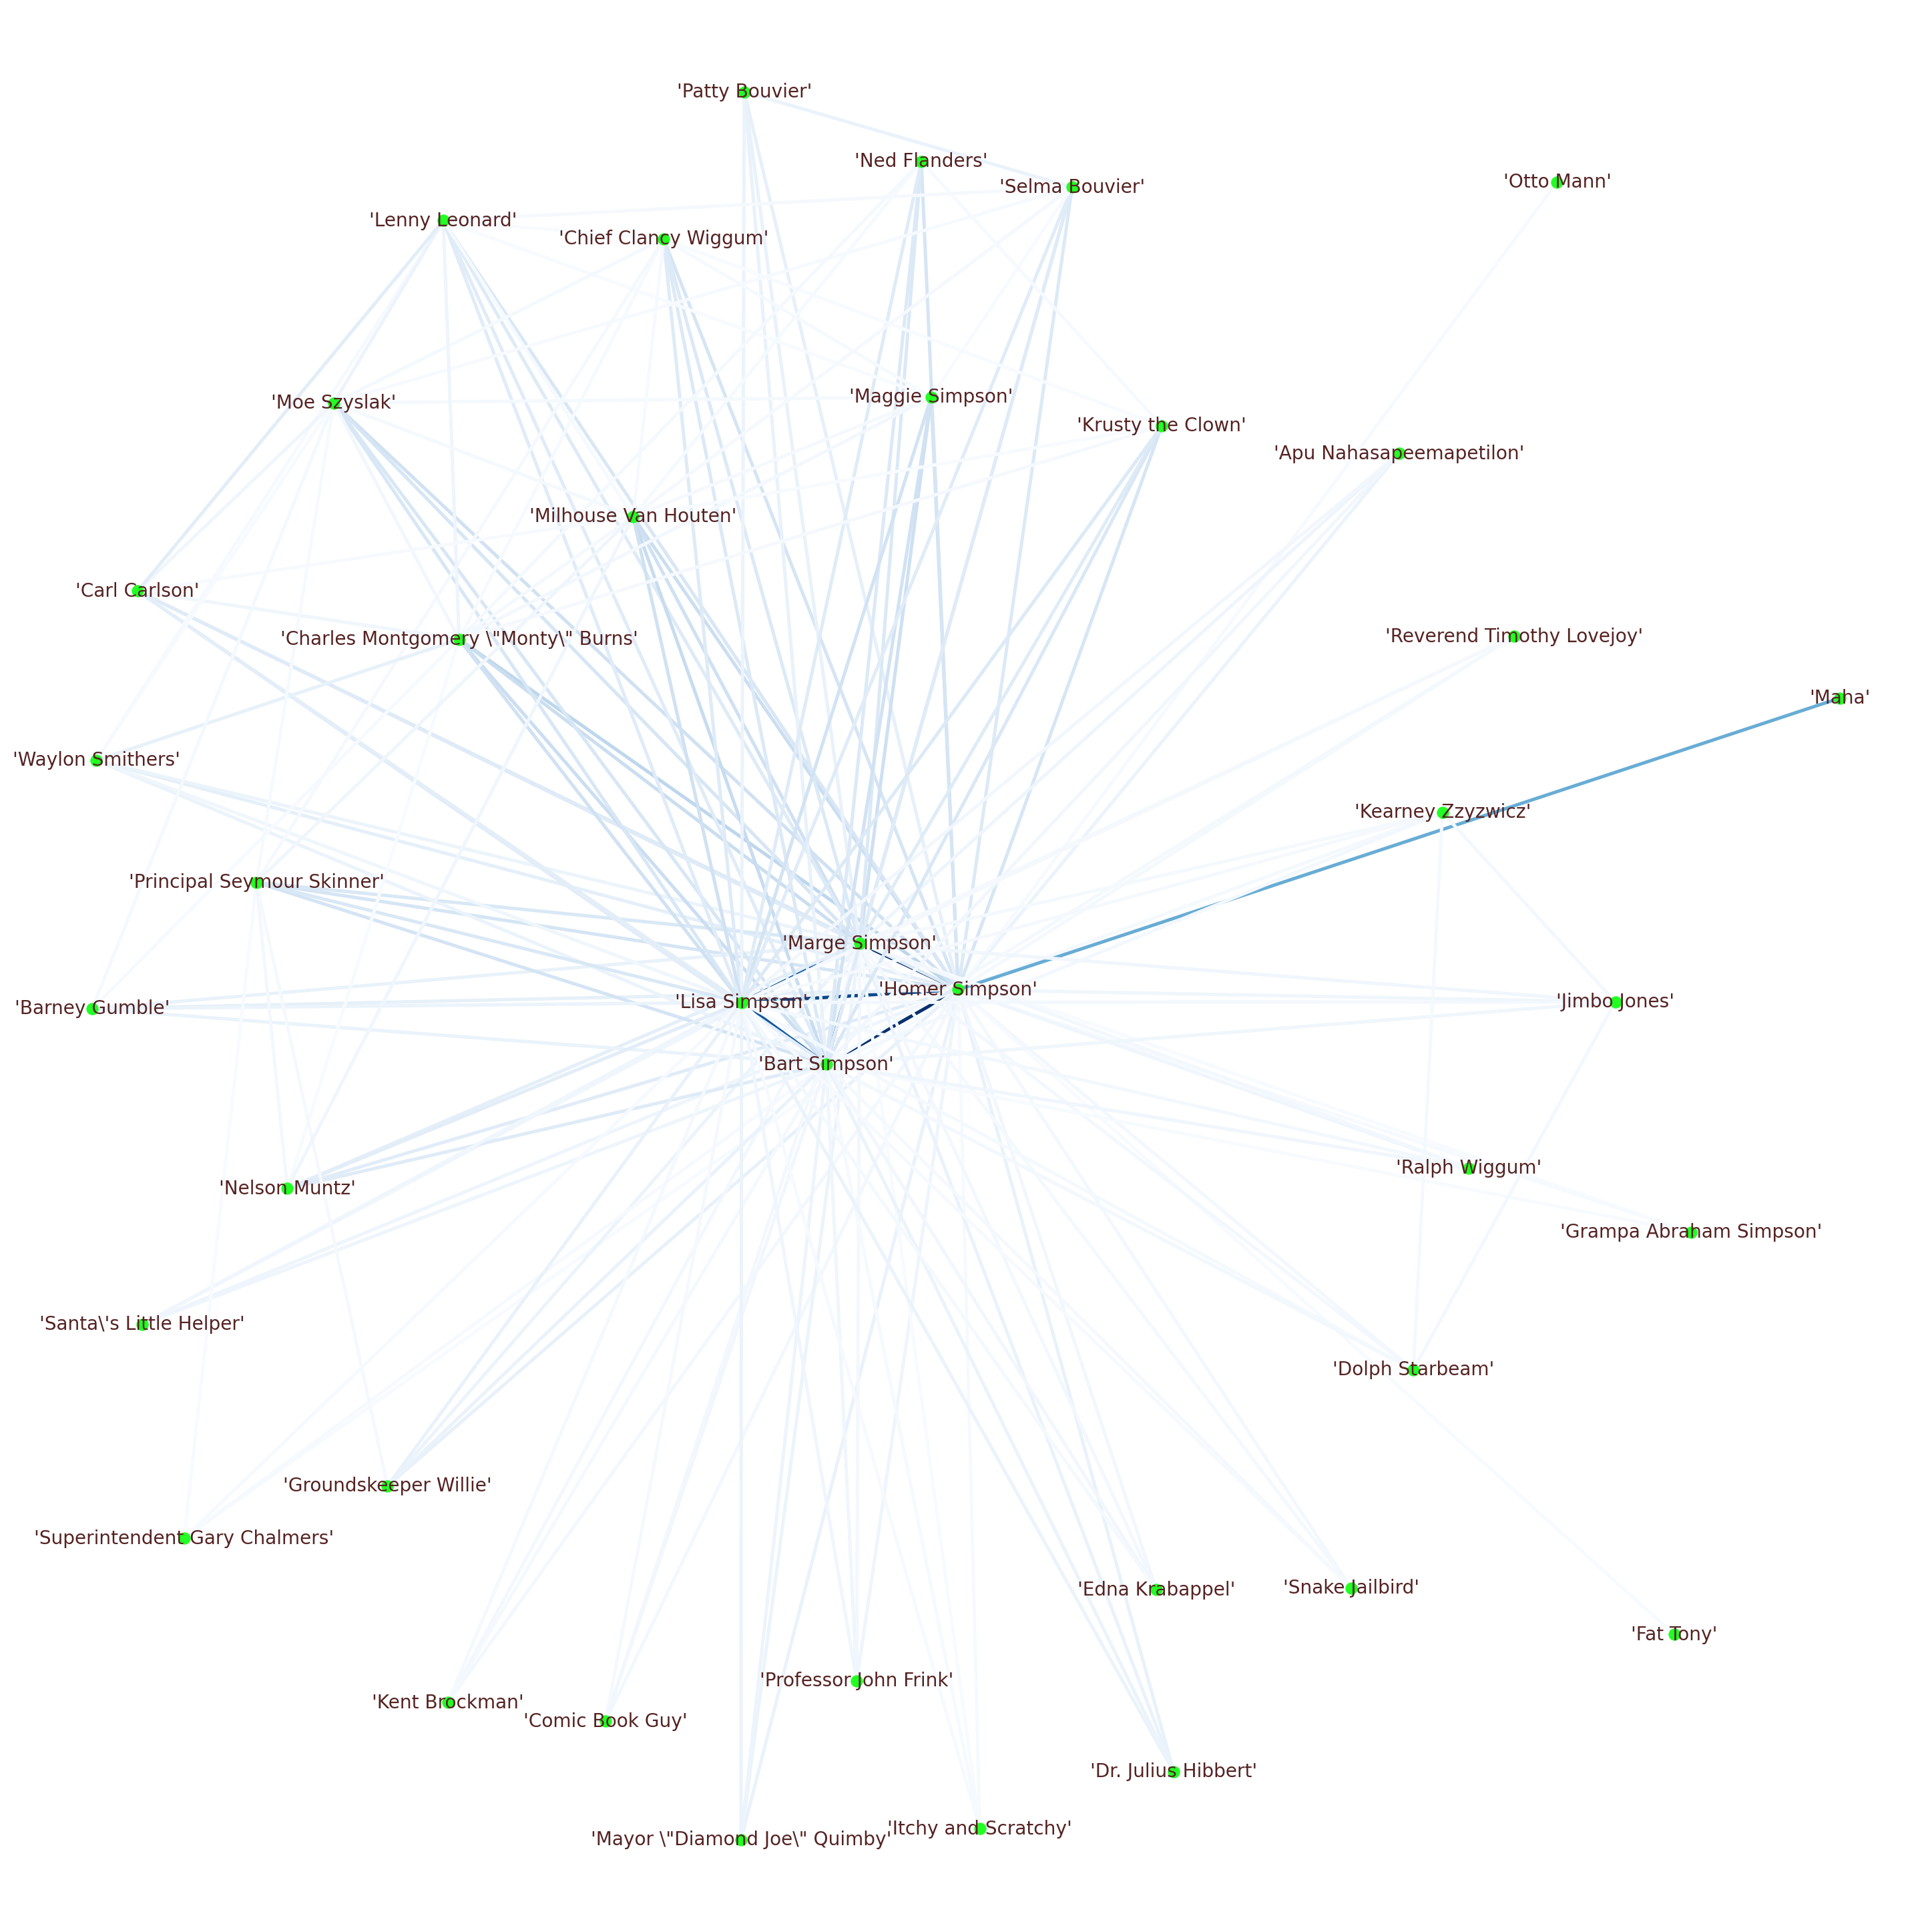

In [12]:
# Relabel the graph
df_nodes_labels_dict = df_nodes.set_index('Id').to_dict()['charname']
graph = nx.relabel_nodes(graph, df_nodes_labels_dict)

# Det the edge color according to the weight
edges,weights = zip(*nx.get_edge_attributes(graph,'Weight').items())

# Dtyle the graph
options = {
    "font_size" : 28,
    "font_color" : '#552222',
    "node_color" : '#22FF22',
    "width" : 5.0,
    "edgelist" : edges,
    "edge_color" : weights,
    "edge_cmap" : plt.cm.Blues,
    "with_labels": True
}

plt.figure(1,figsize=(40,40)) 

# TODO: plot the graph
nx.draw_kamada_kawai(graph, **options)
plt.show()

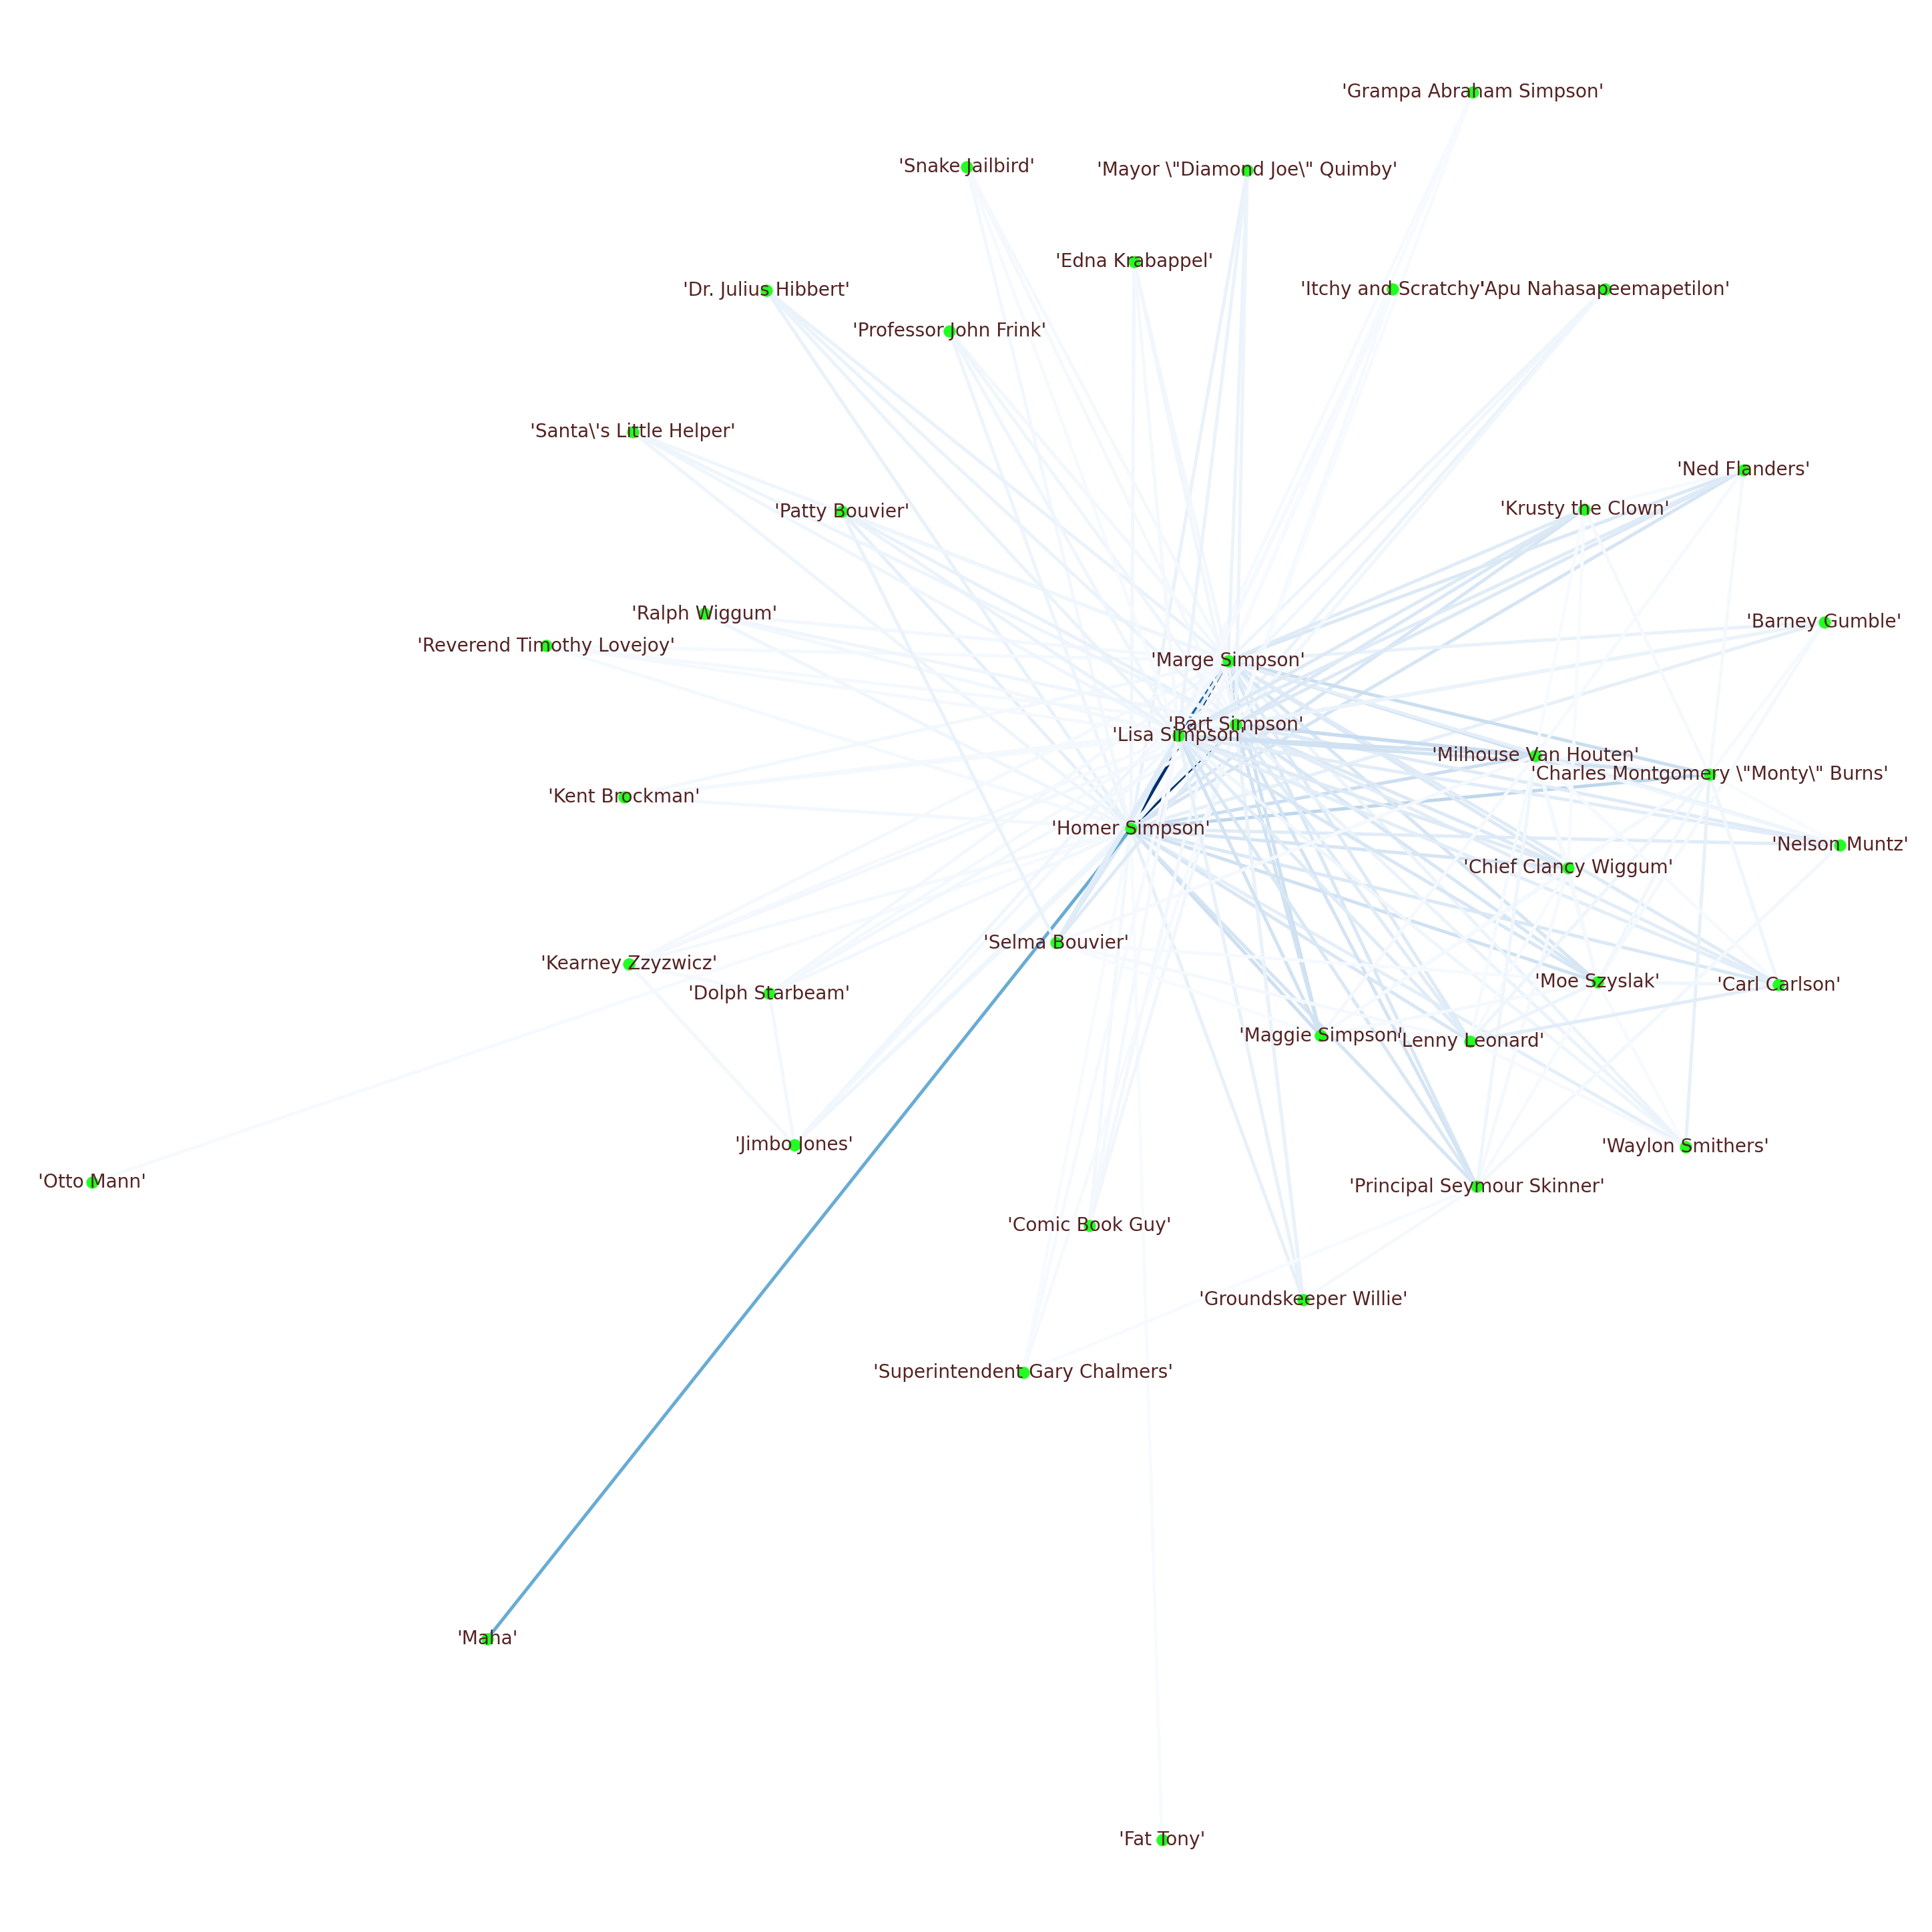

In [13]:
plt.figure(1,figsize=(40,40)) 

# TODO: plot the graph
nx.draw_spring(graph, **options)
plt.show()

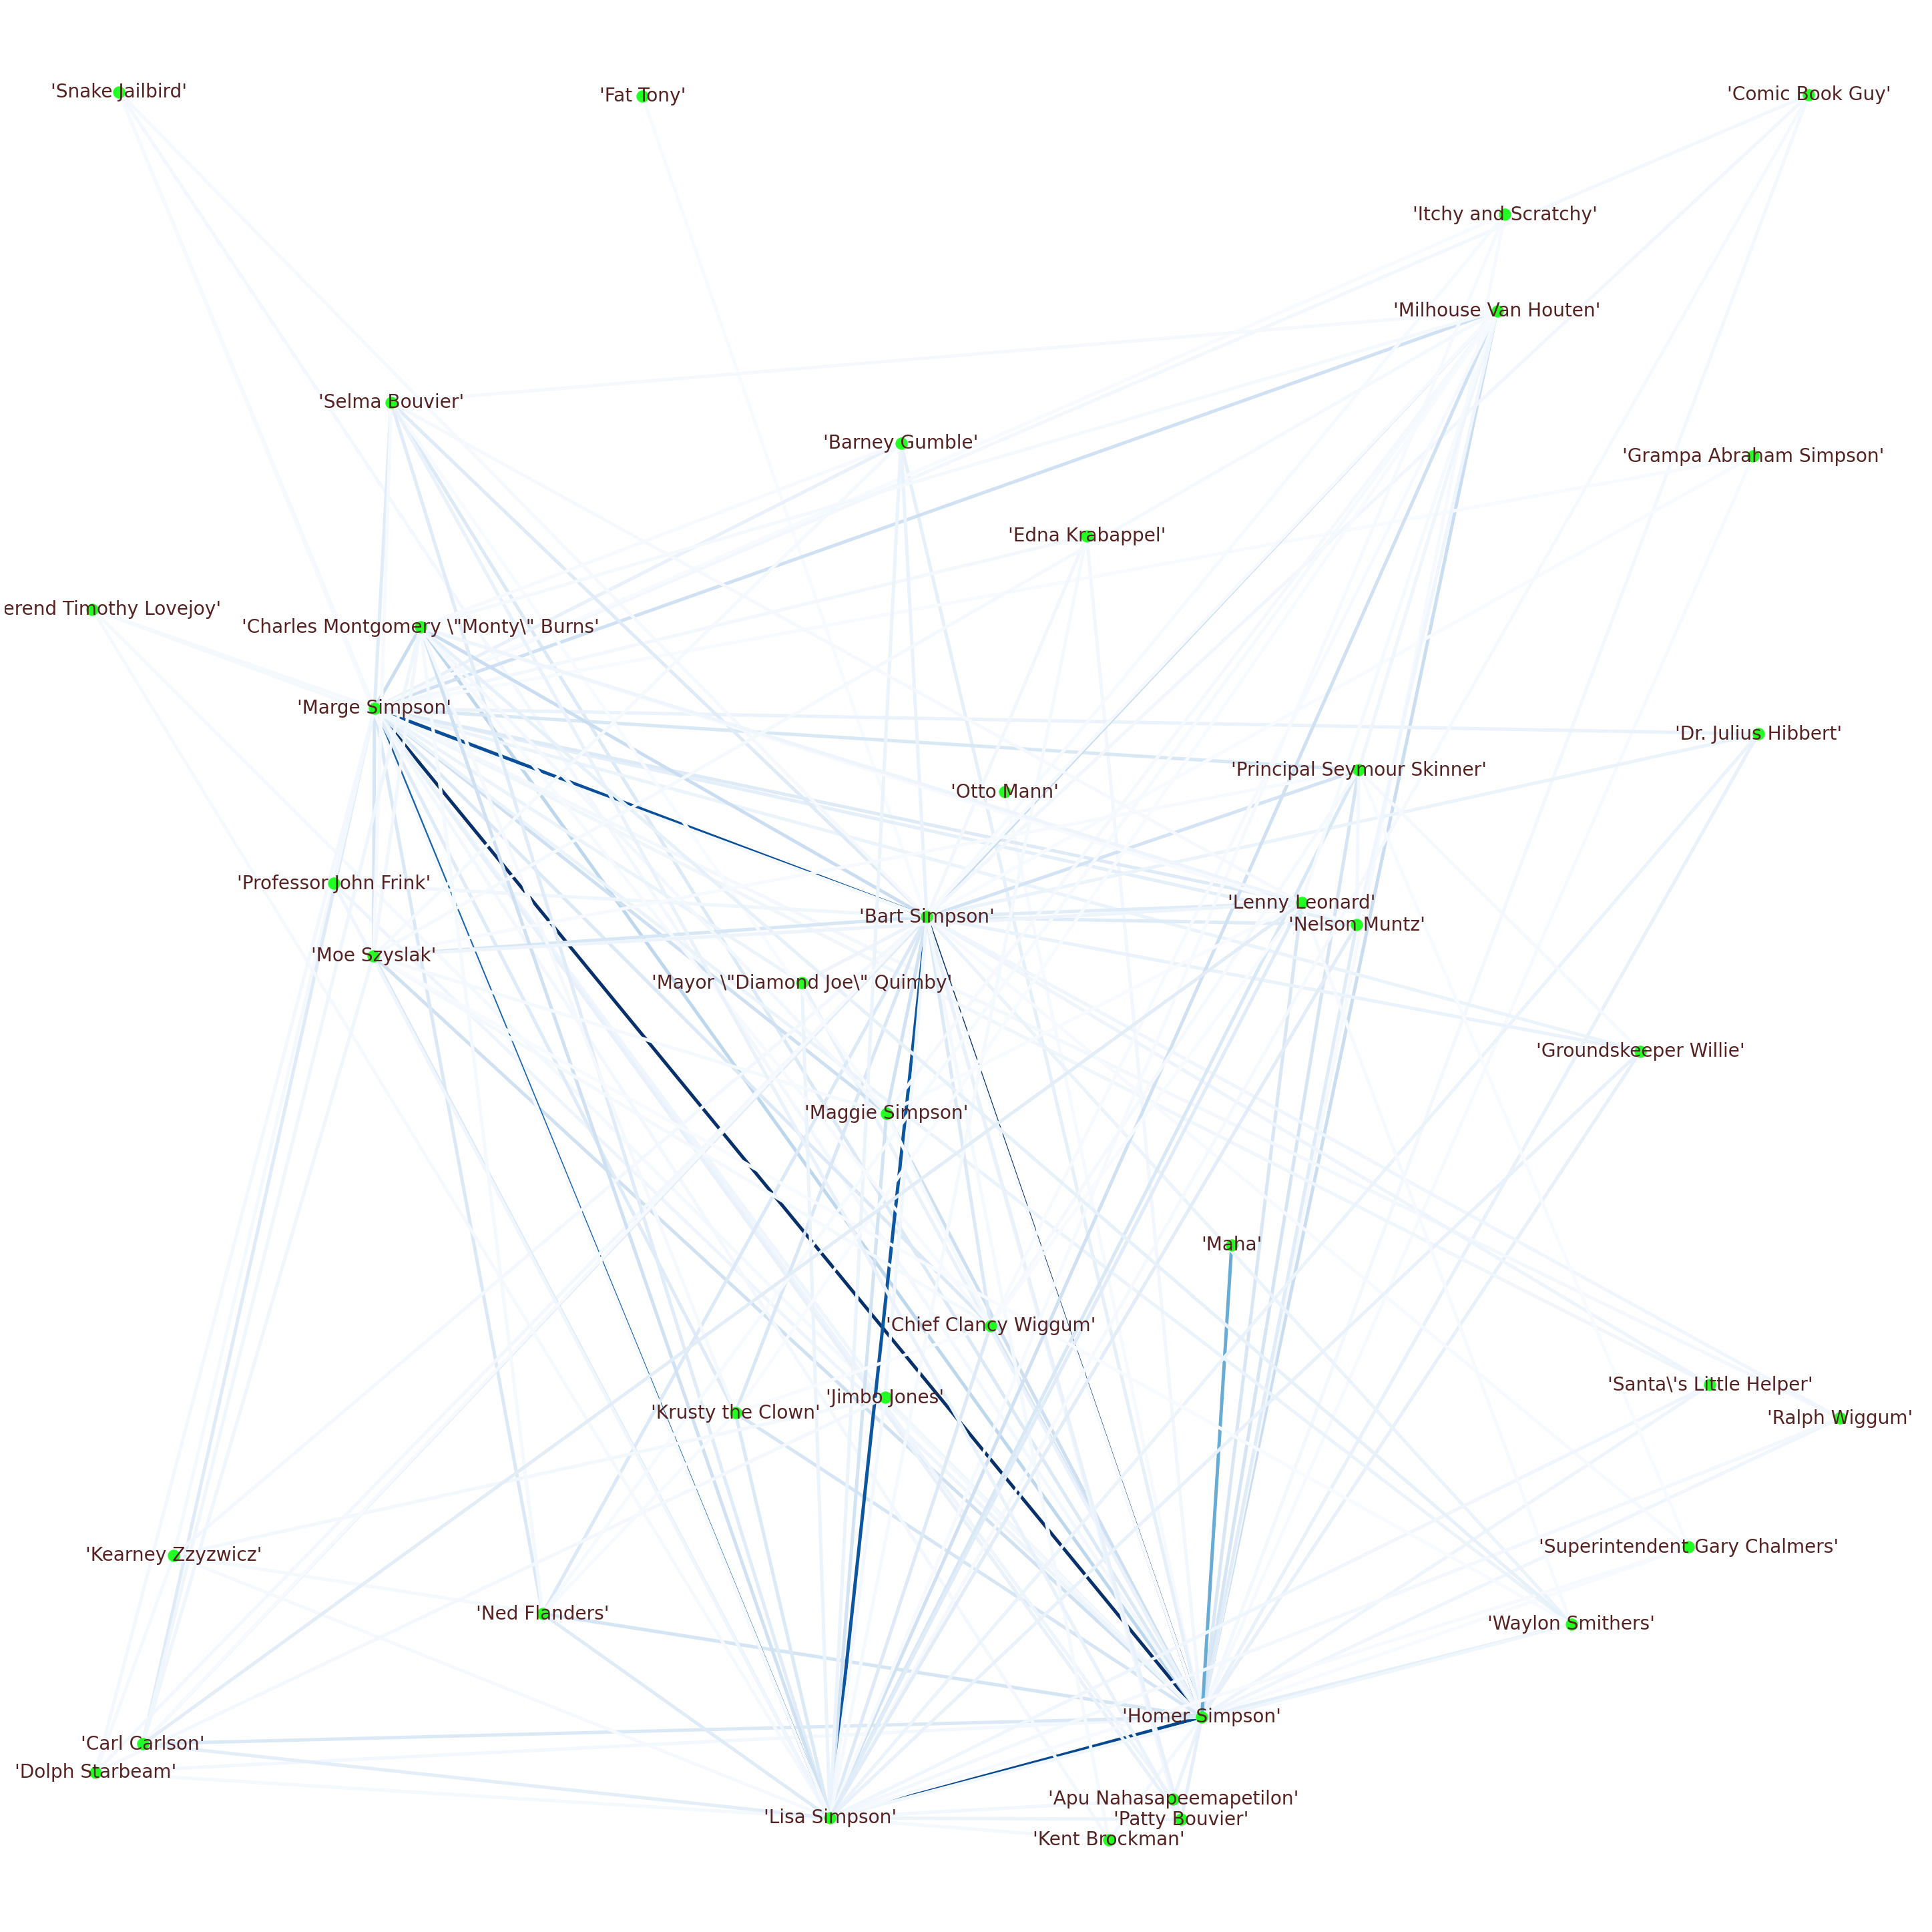

In [14]:
plt.figure(1,figsize=(40,40)) 

# TODO: plot the graph
nx.draw_random(graph, **options)
plt.show()

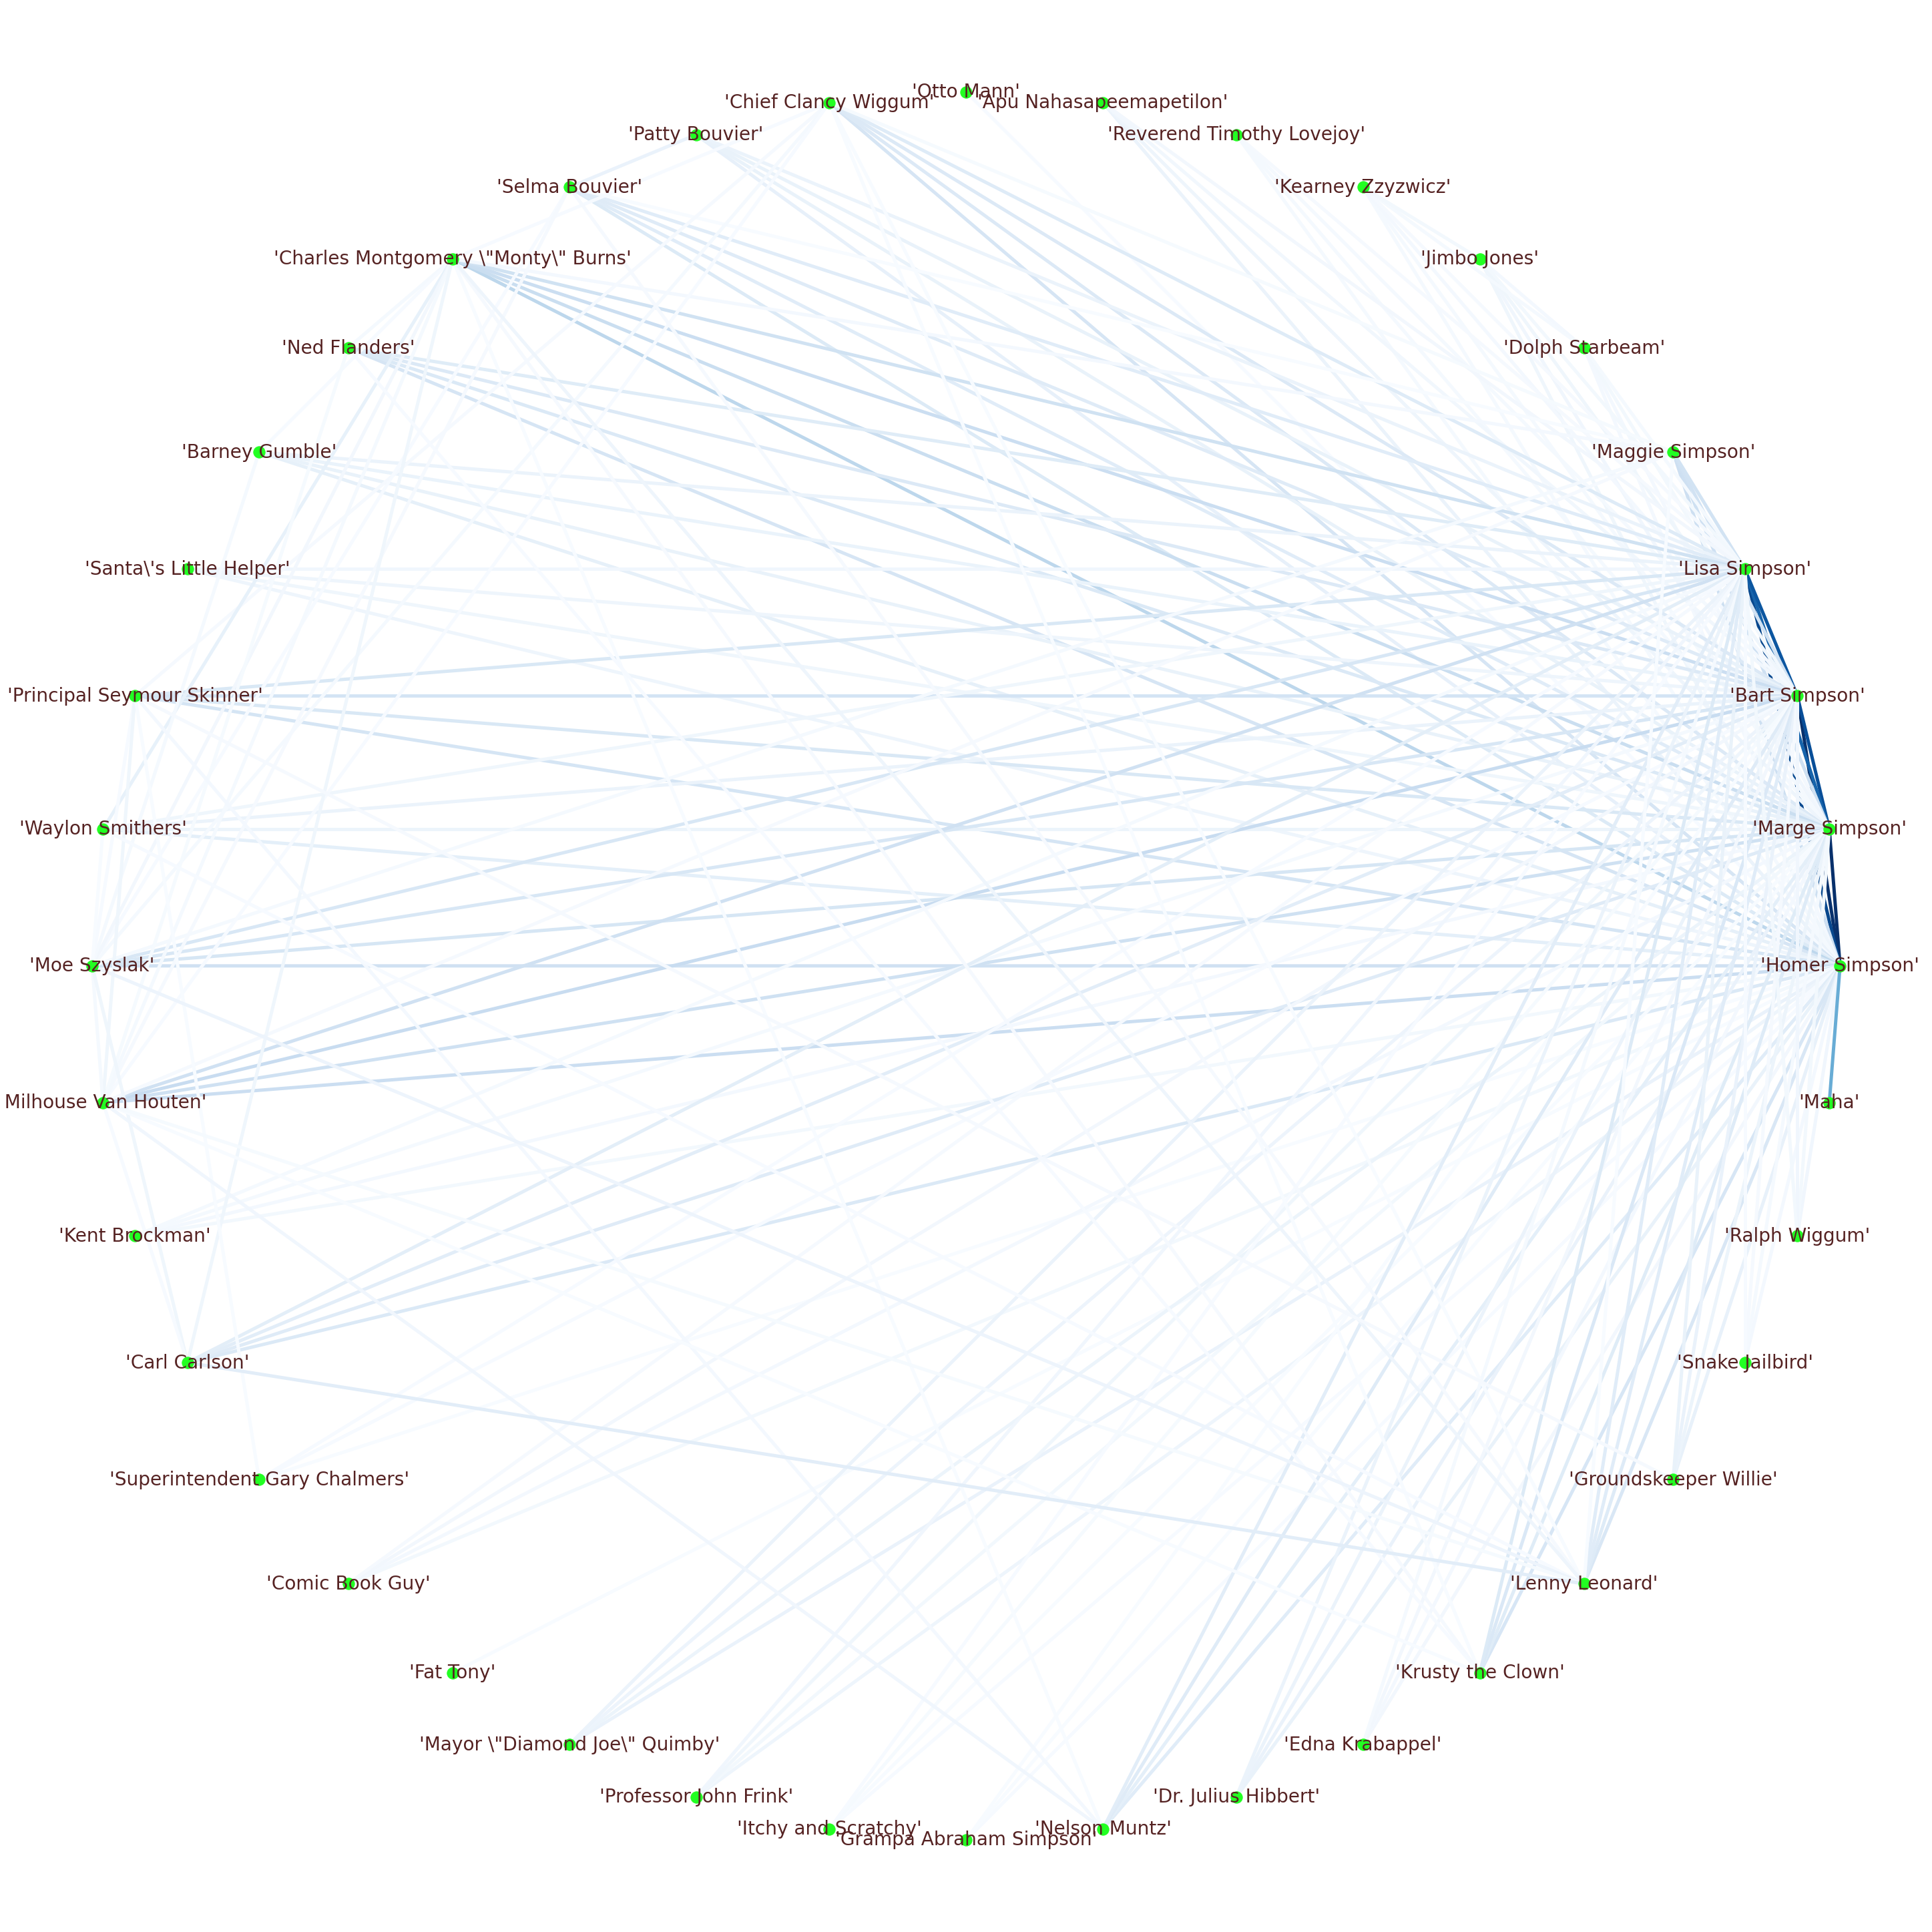

In [15]:
plt.figure(1,figsize=(40,40)) 

# TODO: plot the graph
nx.draw_shell(graph, **options)
plt.show()

**TODO: Write your observations here:** 

The different layout options available in networkX drawing enables visualization of the graph using various layout. I have tried all the layouts and presented only the ones that are distinct above. The following are my observation on each layout and finally I pick the two good layout options for the graph.

1. The first graph is visualized using **Kamada-Kawai forced directed** layout. This layout aims at *minimizing the potential energy* meaning the sparsely connected nodes are pushed outside and the densely connected nodes are centered. This also enforces minimal crossing in the visualized graph and thereby makes the graph easier to understand. <br>
2. The second graph is visualized using **spring** layout. This is also a forced directed representation that applies *Fruchterman-Reingold force-directed algorithm* for placing the nodes. The edges are like springs that hold the nodes close and nodes are like repelling objects. The nodes with high degree are in center and with less degree are farther from the center. This visualization is also intuitive as observed. <br>
3. The third graph is visualized using **random** layout. This method picks positions randomly so the important criteria for good visualization, that is minimal crossing cannot be expected. It is not easy to understand and results in poor choice of positions for the node and edges most of the time. It can be seen from the visualized graph as well. It is difficult to comprehend with all the random criss-crossings. <br>
4. The forth graph is visualized using **shell** layout. Here the nodes are positioned on a circle. It is not easy to distinguish the connectedness of nodes from the visualization as opposed to forced directed representations. There is lot of crossings as well which makes it difficult to understand the edge weight and the postions of adjacent nodes are quite far apart which is another drawback. Also, network is created by just placing the nodes in the same order in the dataframe which is not a good idea for our graph.<br>

From the above observation, I conclude that the suitable visualization layouts for the graph are,
* Kamada-Kawai
* Spring layout  
These two layouts take the degree of the nodes and place the nodes accordingly as discussed above and the networks obtained are easy to understand. 